<a href="https://colab.research.google.com/github/LIMDANBI/2021-2/blob/main/DataMining/classification_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **파이썬을 활용한 지도학습 분류기법 실습 2 #1**
____________________________________________
- 본 실습자료는 파이썬을 활용한 분류기법 실습을 목적으로 작성하였음  
- Logistic Regression, MLP  
  
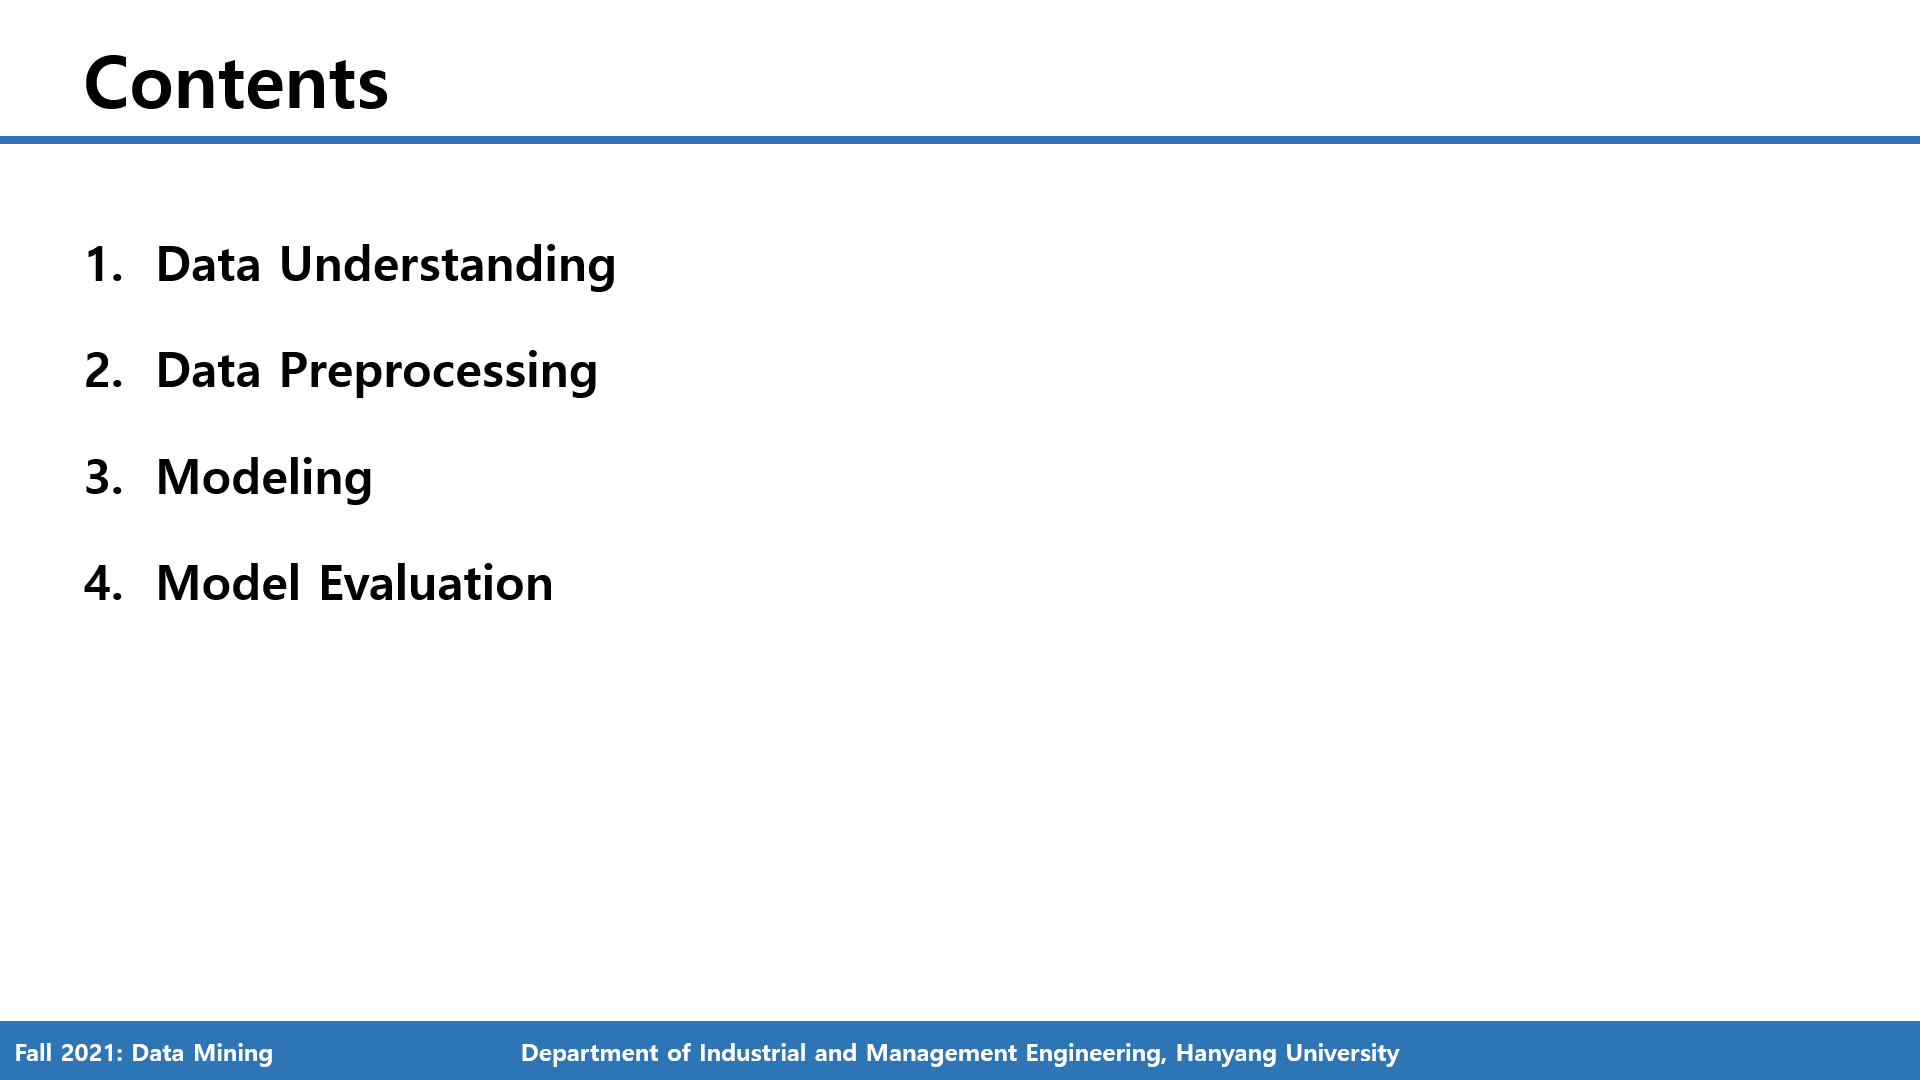


#1. Data Understanding

## 실습 데이터 소개  
- Mortgage 데이터는 은행 인수자가 승인한 모기지(주택담보대출) 데이터가 포함되어 있습니다. 
- 목표는 이러한 승인된 모기지 미래에 대해 채무 불이행(OUTCOME==default)을 예측하는 것






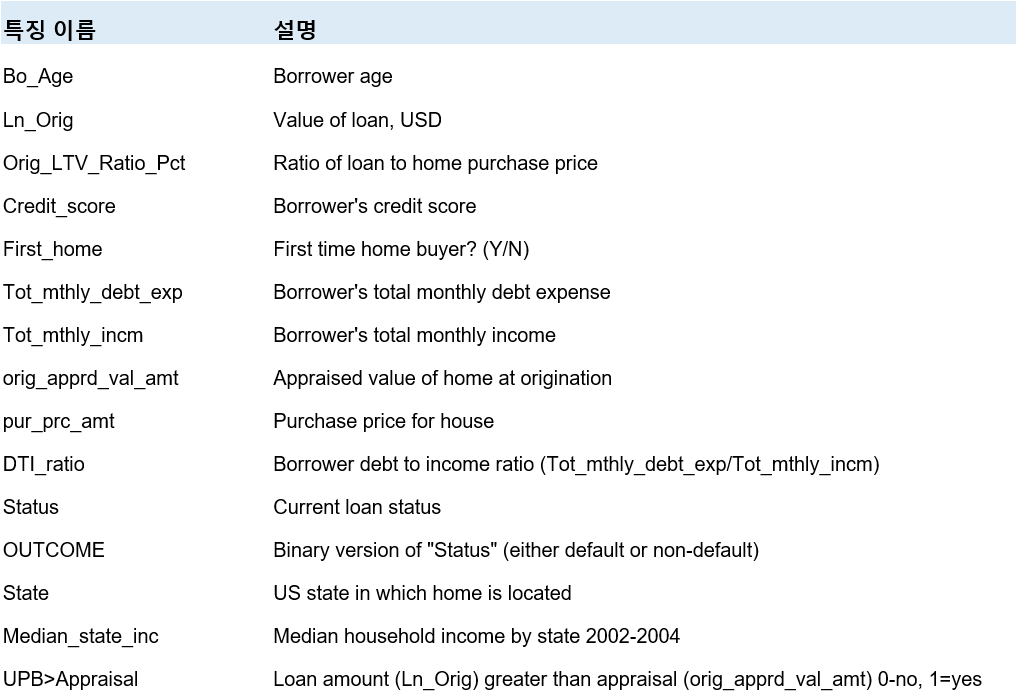

## 데이터 불러오기 (from GoogleDrive)

In [1]:
import pandas as pd

# 구글 드라이브 링크
url = 'https://drive.google.com/file/d/10aC0lRIPAyDksShWL2Z8y6GzS1ZijYEe/view?usp=sharing'

In [2]:
# 구글 드라이브 링크를 활용한 데이터 불러오기
def f(x):
    y = 'https://drive.google.com/uc?export=download&id='+x.split('/')[-2]
    return y

df = pd.read_csv(f(url))

In [3]:
df

,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,orig_apprd_val_amt,pur_prc_amt,DTI Ratio,OUTCOME,State,Median_state_inc,UPB>Appraisal
0,37,75650.0,85,669,N,1707,6000,169000,160000,0.284500,non-default,FL,"40,171",0
1,46,390775.0,102,684,N,0,5025,310000,309000,0.000000,non-default,NY,"44,228",1
2,30,112500.0,90,662,Y,1812,4800,177000,176450,0.377500,non-default,CA,"49,894",0
3,24,85250.0,97,647,N,3395,6934,113000,110000,0.489616,non-default,GA,"43,217",0
4,35,114000.0,100,791,N,3801,5504,103000,103000,0.690589,non-default,NH,"57,352",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15148,49,211638.0,102,625,N,1701,3033,140000,139725,0.560831,non-default,GA,"43,217",1
15149,37,99200.0,80,661,N,1446,3481,147000,144000,0.415398,non-default,SC,"39,326",0
15150,36,136400.0,99,650,Y,2990,5876,183000,170000,0.508850,non-default,FL,"40,171",0
15151,46,29900.0,100,562,N,2854,7830,185000,185000,0.364496,default,IN,"43,003",0


##결측치 확인 및 특징별 데이터 타입 식별

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15153 entries, 0 to 15152
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bo_Age              15153 non-null  int64  
 1   Ln_Orig             15153 non-null  float64
 2   Orig_LTV_Ratio_Pct  15153 non-null  int64  
 3   Credit_score        15153 non-null  int64  
 4   First_home          15153 non-null  object 
 5   Tot_mthly_debt_exp  15153 non-null  int64  
 6   Tot_mthly_incm      15153 non-null  int64  
 7   orig_apprd_val_amt  15153 non-null  int64  
 8   pur_prc_amt         15153 non-null  int64  
 9   DTI Ratio           15153 non-null  float64
 10  OUTCOME             15153 non-null  object 
 11  State               15153 non-null  object 
 12  Median_state_inc    15153 non-null  object 
 13  UPB>Appraisal       15153 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.6+ MB


In [5]:
df['First_home'].unique() # => 0 과 1로 변경

array(['N', 'Y'], dtype=object)

In [6]:
df['State'].unique() # => one hot encoding

array(['FL', 'NY', 'CA', 'GA', 'NH', 'MO', 'MI', 'TX', 'PA', 'WA', 'NE',
       'NJ', 'IA', 'IN', 'ID', 'WI', 'OH', 'CT', 'NC', 'AR', 'AZ', 'IL',
       'TN', 'SC', 'AL', 'MD', 'HI', 'CO', 'OR', 'VA', 'NV', 'UT', 'MT',
       'LA', 'MN', 'NM', 'MS', 'DE', 'DC', 'SD', 'MA', 'KS', 'KY', 'RI',
       'ND', 'WY', 'ME', 'OK', 'AK', 'VT', 'WV'], dtype=object)

In [7]:
len(df['State'].unique())

51

In [8]:
df['Median_state_inc'] # object => int

0        40,171
1        44,228
2        49,894
3        43,217
4        57,352
          ...  
15148    43,217
15149    39,326
15150    40,171
15151    43,003
15152    45,787
Name: Median_state_inc, Length: 15153, dtype: object

## 클래스 불균형도 확인

In [9]:
df['OUTCOME'].unique() ## Target variable

array(['non-default', 'default'], dtype=object)

In [10]:
df['OUTCOME'].value_counts() # => oversampling 필요

non-default    14751
default          402
Name: OUTCOME, dtype: int64

#2. Data Preprocessing 

## 데이터 분할1 - 특징(X)과 라벨(y)


In [11]:
X = df.drop('OUTCOME', axis=1)
y = df['OUTCOME']

In [12]:
X

,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,orig_apprd_val_amt,pur_prc_amt,DTI Ratio,State,Median_state_inc,UPB>Appraisal
0,37,75650.0,85,669,N,1707,6000,169000,160000,0.284500,FL,"40,171",0
1,46,390775.0,102,684,N,0,5025,310000,309000,0.000000,NY,"44,228",1
2,30,112500.0,90,662,Y,1812,4800,177000,176450,0.377500,CA,"49,894",0
3,24,85250.0,97,647,N,3395,6934,113000,110000,0.489616,GA,"43,217",0
4,35,114000.0,100,791,N,3801,5504,103000,103000,0.690589,NH,"57,352",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15148,49,211638.0,102,625,N,1701,3033,140000,139725,0.560831,GA,"43,217",1
15149,37,99200.0,80,661,N,1446,3481,147000,144000,0.415398,SC,"39,326",0
15150,36,136400.0,99,650,Y,2990,5876,183000,170000,0.508850,FL,"40,171",0
15151,46,29900.0,100,562,N,2854,7830,185000,185000,0.364496,IN,"43,003",0


In [13]:
y

0        non-default
1        non-default
2        non-default
3        non-default
4        non-default
            ...     
15148    non-default
15149    non-default
15150    non-default
15151        default
15152    non-default
Name: OUTCOME, Length: 15153, dtype: object

## Feature Encoding

In [14]:
X['Median_state_inc'] = X['Median_state_inc'].str.replace(',', '').astype(int) ## type correction
X['First_home'] = X['First_home'].replace({'N':0, 'Y':1}) # binary type

In [16]:
!pip install feature_engine

     |████████████████████████████████| 180 kB 5.3 MB/s 
     |████████████████████████████████| 9.8 MB 47.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [17]:
from feature_engine.encoding import OneHotEncoder
ohe_enc = OneHotEncoder(variables=['State'], drop_last=True) # for non binary type
ohe_enc.fit(X)

X = ohe_enc.transform(X)

In [18]:
ohe_enc.encoder_dict_

{'State': ['FL',
  'NY',
  'CA',
  'GA',
  'NH',
  'MO',
  'MI',
  'TX',
  'PA',
  'WA',
  'NE',
  'NJ',
  'IA',
  'IN',
  'ID',
  'WI',
  'OH',
  'CT',
  'NC',
  'AR',
  'AZ',
  'IL',
  'TN',
  'SC',
  'AL',
  'MD',
  'HI',
  'CO',
  'OR',
  'VA',
  'NV',
  'UT',
  'MT',
  'LA',
  'MN',
  'NM',
  'MS',
  'DE',
  'DC',
  'SD',
  'MA',
  'KS',
  'KY',
  'RI',
  'ND',
  'WY',
  'ME',
  'OK',
  'AK',
  'VT']}

In [19]:
 # Label Encoding
y = y.replace({'non-default':-1, 'default':1})

## 데이터 분할2 - 학습 데이터(Train), 평가(Test) 데이터


In [20]:
from sklearn.model_selection import train_test_split

Train_X, Test_X , Train_y , Test_y = train_test_split(X, y)

In [21]:
print("Train ratio of X:", Train_X.shape[0] / X.shape[0])
print("Test ratio of X:", Test_X.shape[0] / X.shape[0])

Train ratio of X: 0.7499505048505246
Test ratio of X: 0.25004949514947533


## Feature Discretizing

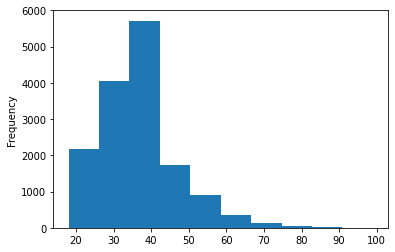

In [22]:
df['Bo_Age'].plot(kind = 'hist')

In [23]:
print(df['Bo_Age'].min(), df['Bo_Age'].max())

18 99


In [28]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins= 10, encode='ordinal')
est.fit(Train_X['Bo_Age'].values.reshape(-1,1))
Train_X['Bo_Age'] = est.transform(Train_X['Bo_Age'].values.reshape(-1,1))
Test_X['Bo_Age'] = est.transform(Test_X['Bo_Age'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ""

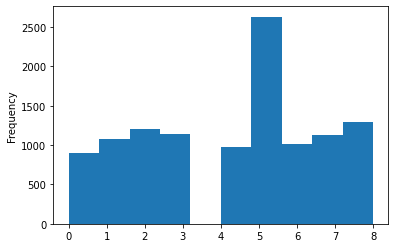

In [27]:
Train_X['Bo_Age'].plot(kind = 'hist')

## Feature Scaling
Logistic Regression, MLP, DNN <br>
=> scailng(0 to 1(or -1))이 되어있어야 이상치에 덜 민감하게 수행 가능  

In [30]:
from sklearn.preprocessing import MinMaxScaler as MMS
scaler = MMS().fit(Train_X) # 최소 0 ~ 최대 1

Train_X = scaler.transform(Train_X)
Test_X = scaler.transform(Test_X)

## Oversampling (SMOTE)

- SMOTE(synthetic minority oversampling technique)란, 오버 샘플링 기법 중 하나로 k-최근접 이웃에 해당하는 소수 클래스 샘플(minority sample)에 대해 선형 보간법(linear interpolation)을 활용하여 무작위로 샘플을 생성하는 방식.  

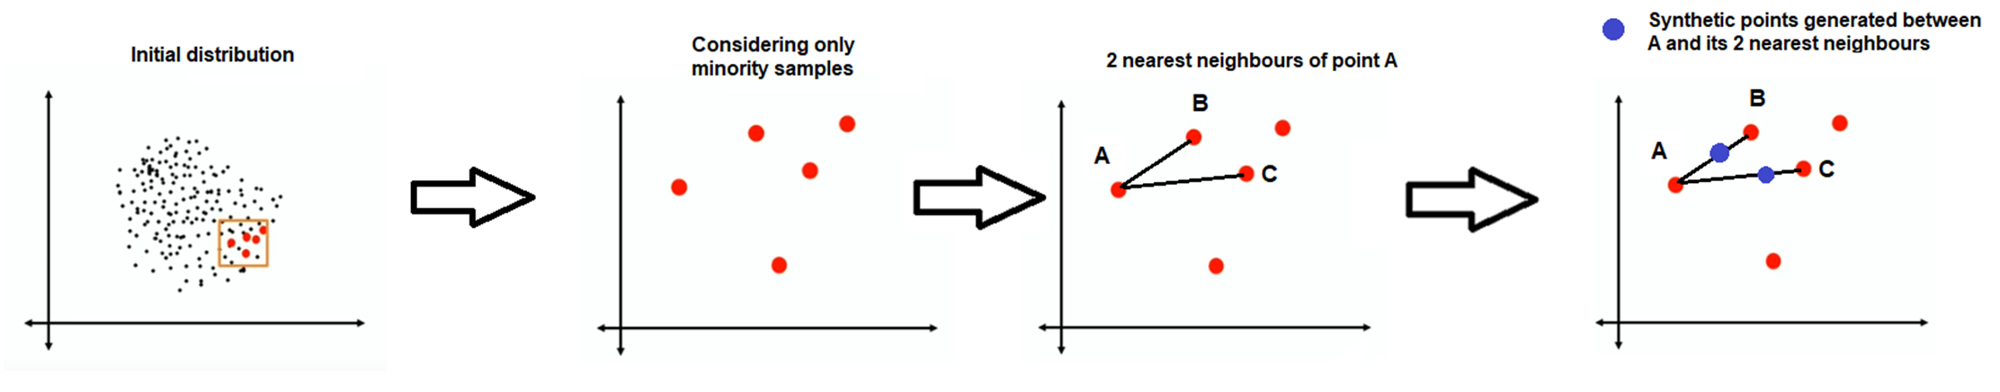

In [31]:
pd.Series(Train_y).value_counts() #before

-1    11070
 1      294
Name: OUTCOME, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors = 3)
Train_X, Train_y = smote.fit_sample(Train_X, Train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [33]:
pd.Series(Train_y).value_counts() #after

-1    11070
 1    11070
dtype: int64

## 전처리 결과

In [34]:
pd.DataFrame(Train_X, columns = X.columns)

,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,orig_apprd_val_amt,pur_prc_amt,DTI Ratio,Median_state_inc,UPB>Appraisal,State_FL,State_NY,State_CA,State_GA,State_NH,State_MO,State_MI,State_TX,State_PA,State_WA,State_NE,State_NJ,State_IA,State_IN,State_ID,State_WI,State_OH,State_CT,State_NC,State_AR,State_AZ,State_IL,State_TN,State_SC,State_AL,State_MD,State_HI,State_CO,State_OR,State_VA,State_NV,State_UT,State_MT,State_LA,State_MN,State_NM,State_MS,State_DE,State_DC,State_SD,State_MA,State_KS,State_KY,State_RI,State_ND,State_WY,State_ME,State_OK,State_AK,State_VT
0,0.142857,0.024767,0.846154,0.159926,1.0,0.088186,0.050574,0.175862,0.156353,0.117785,0.258894,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.571429,0.406282,0.879121,0.237132,0.0,0.111408,0.050667,0.220690,0.201765,0.148564,0.532973,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.116155,0.879121,0.501838,0.0,0.147402,0.108527,0.310345,0.294000,0.098753,0.429189,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.460217,0.879121,0.428309,1.0,0.066996,0.033178,0.103448,0.080000,0.127512,0.480031,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.301433,0.879121,0.365809,0.0,0.100145,0.070155,0.270115,0.252941,0.100145,0.403869,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22135,0.196170,0.196672,0.879121,0.417559,0.0,0.087193,0.067453,0.221156,0.172496,0.091348,0.727900,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22136,0.384384,0.216135,0.818216,0.418136,0.0,0.055261,0.080265,0.161046,0.112100,0.048301,0.650123,0.538138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22137,0.582885,0.403866,0.730742,0.390897,0.0,0.072720,0.031950,0.140211,0.119498,0.142482,0.429189,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22138,0.340877,0.248651,0.879121,0.365754,0.0,0.069343,0.036130,0.091029,0.069642,0.123170,0.258894,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
Train_y

array([-1, -1, -1, ...,  1,  1,  1])

# Modeling

## Logistic Regression
__________
- Method: 
 - ``` sklearn.linear_model.LogisticRegression```    

- Key Assumptions:  
  - This model requires the dependent variable to be **binary**, multinomial or ordinal in nature. 
  - This model assumes **linearity** of **independent variables**.
  

- Key Parameters
  - **solver**: the algorithm to be used in optimization. ('newton-cg', ** 'lbfgs'**, 'liblinear', 'sag', 'saga')
  - **max_iter**: the maximum number of iterations (default=100)

- Reference  
  - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [36]:
from sklearn.linear_model import LogisticRegression as LR

model_LR = LR(max_iter=1000, random_state=0).fit(Train_X, Train_y)

In [37]:
model_LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Multi Layer Perceptron  
__________
- Method: 
 - ``` sklearn.neural_network.MLPClassifier```    

- Key Parameters
  - **hidden_layer_sizes**: the number of neurons in ith hidden layer (default = **(100,)**)
  - **activation**: activation function for hidden layer ('identity', 'logistic', 'tanh', **'relu'**)
  - **max_iter**: Maximum number of iterations (default=**200**)

- Reference  
  - https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [38]:
from sklearn.neural_network import MLPClassifier as MLP
model_MLP = MLP(hidden_layer_sizes = (100, 100), max_iter=1000, activation='relu', alpha=1)
model_MLP.fit(Train_X, Train_y)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [39]:
model_MLP

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## Deep Neural Network
__________
- Method: 
 - ``` tensorflow & tensorflow.keras```    

- Contents
 - Deep Neural Network 정의 (layer type, activation 정의 등)
 - Complier 정의 (optimizer, loss function, metric 정의 등)
 - Training 단계 고려사항 (batchsize, epoch, earlystopping 조건 정의 등)

- Reference  
  - https://www.tensorflow.org/learn?hl=ko

In [40]:
import tensorflow as tf
from tensorflow import keras

METRICS = [
      keras.metrics.BinaryAccuracy(name='ACC'),
      keras.metrics.Precision(name='PRE'),
      keras.metrics.Recall(name='REC'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [41]:
model_DNN = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(Train_X.shape[-1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='softmax'),
])

model_DNN.compile(
      optimizer= keras.optimizers.Adam(learning_rate=1e-3),
      loss= keras.losses.BinaryCrossentropy(),
      metrics= METRICS)

model_DNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1008      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [43]:
model_DNN.fit(Train_X, Train_y, batch_size = 256, epochs=30)

Epoch 1/30
87/87 [==============================] - 0s 2ms/step - loss: -42.1294 - ACC: 0.5000 - PRE: 1.0000 - REC: 1.0000 - auc: 0.0000e+00 - prc: 1.0000
Epoch 2/30
87/87 [==============================] - 0s 2ms/step - loss: -45.3639 - ACC: 0.5000 - PRE: 1.0000 - REC: 1.0000 - auc: 0.0000e+00 - prc: 1.0000
Epoch 3/30
87/87 [==============================] - 0s 2ms/step - loss: -46.5912 - ACC: 0.5000 - PRE: 1.0000 - REC: 1.0000 - auc: 0.0000e+00 - prc: 1.0000
Epoch 4/30
87/87 [==============================] - 0s 2ms/step - loss: -49.6418 - ACC: 0.5000 - PRE: 1.0000 - REC: 1.0000 - auc: 0.0000e+00 - prc: 1.0000
Epoch 5/30
87/87 [==============================] - 0s 2ms/step - loss: -52.9287 - ACC: 0.5000 - PRE: 1.0000 - REC: 1.0000 - auc: 0.0000e+00 - prc: 1.0000
Epoch 6/30
87/87 [==============================] - 0s 2ms/step - loss: -56.1323 - ACC: 0.5000 - PRE: 1.0000 - REC: 1.0000 - auc: 0.0000e+00 - prc: 1.0000
Epoch 7/30
87/87 [==============================] - 0s 2ms/step - loss

# Model Evaluation

## Scores

In [44]:
pred_y_LR = model_LR.predict(Test_X)
pred_y_MLP = model_MLP.predict(Test_X)
pred_y_DNN = model_DNN.predict(Test_X, batch_size=256)

In [45]:
pred_y_LR

array([-1, -1, -1, ..., -1,  1, -1])

In [46]:
model_LR.predict_proba(Test_X)

array([[0.74048571, 0.25951429],
       [0.61454635, 0.38545365],
       [0.60932667, 0.39067333],
       ...,
       [0.50724606, 0.49275394],
       [0.32550407, 0.67449593],
       [0.5353895 , 0.4646105 ]])

Text(0.5, 1.0, 'Deep Neural Network')

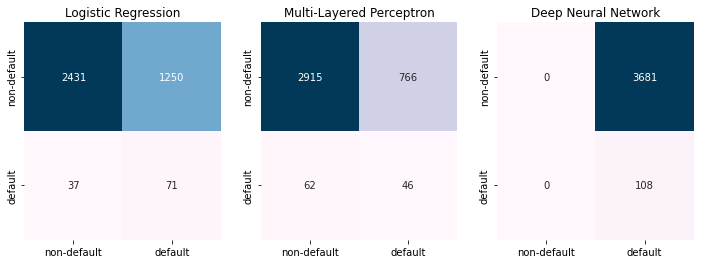

In [47]:
import numpy as np
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt
label = list(df.OUTCOME.unique())

f, ax = plt.subplots(nrows =1, ncols= 3, figsize = (12, 4))

sns.heatmap(confusion_matrix(Test_y, pred_y_LR), xticklabels = label, yticklabels= label,
            annot = True, cmap='PuBu', cbar = False, fmt="d", ax = ax[0]).set_title('Logistic Regression')
sns.heatmap(confusion_matrix(Test_y, pred_y_MLP), xticklabels = label, yticklabels= label,
            annot = True, cmap='PuBu', cbar = False, fmt="d", ax = ax[1]).set_title('Multi-Layered Perceptron')
sns.heatmap(confusion_matrix(Test_y, pred_y_DNN), xticklabels = label, yticklabels= label,
            annot = True, cmap='PuBu', cbar = False, fmt="d", ax = ax[2]).set_title('Deep Neural Network')

In [48]:
print(classification_report(Test_y, pred_y_LR))

              precision    recall  f1-score   support

          -1       0.99      0.66      0.79      3681
           1       0.05      0.66      0.10       108

    accuracy                           0.66      3789
   macro avg       0.52      0.66      0.45      3789
weighted avg       0.96      0.66      0.77      3789



In [49]:
print(classification_report(Test_y, pred_y_MLP))

              precision    recall  f1-score   support

          -1       0.98      0.79      0.88      3681
           1       0.06      0.43      0.10       108

    accuracy                           0.78      3789
   macro avg       0.52      0.61      0.49      3789
weighted avg       0.95      0.78      0.85      3789



In [50]:
print(classification_report(Test_y, pred_y_DNN))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      3681
           1       0.03      1.00      0.06       108

    accuracy                           0.03      3789
   macro avg       0.01      0.50      0.03      3789
weighted avg       0.00      0.03      0.00      3789



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ROC Curve

In [51]:
def plot_roc(y, pred_y, name):
    fpr, tpr, _ = roc_curve(y, pred_y)
    roc_auc = auc(fpr, tpr) # Compute Area Under he Curve (AUC) using sklearn.metric.auc function

    plt.plot(fpr, tpr, linewidth=2, label=name + '(AUC = %0.2f)' % roc_auc)
    plt.xlabel('False Positives Rate')
    plt.ylabel('True Positives Rate')

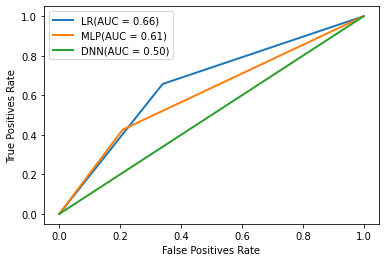

In [52]:
plot_roc(Test_y, pred_y_LR, 'LR')
plot_roc(Test_y, pred_y_MLP, 'MLP')
plot_roc(Test_y, pred_y_DNN, 'DNN')
plt.legend()